<a href="https://colab.research.google.com/github/Shoaib-Siddiq/L/blob/main/Day_6_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import seaborn as sns

In [ ]:
# Load the dataset
# The file 'Credit.csv' has been loaded.
df = pd.read_csv(r'/content/drive/MyDrive/ML Projects/Credit.csv')

In [ ]:
# --- Data Preprocessing for Binary Classification ---
# We will create a binary classification problem: classifying if a user's balance is high or low.
# We'll use the median balance as the threshold.
median_balance = df['Balance'].median()
df['HighBalance'] = (df['Balance'] > median_balance).astype(int)

In [ ]:
# Select features (X) and target (y)
# We will use 'Income', 'Limit', and 'Rating' as features to predict 'HighBalance'.
X = df[['Income', 'Limit', 'Rating']]
y = df['HighBalance']

In [ ]:
# Drop any rows with missing values in the selected columns
X.dropna(inplace=True)
y = y[X.index] # Ensure y is aligned with the cleaned X

/tmp/ipython-input-4204397735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


In [ ]:
# --- Single Train-Test Split for Detailed Evaluation ---
# This part of the code provides a detailed look at the model's performance on one specific test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Initialize and train the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions and get probability scores
y_pred = dt_classifier.predict(X_test)
y_pred_proba = dt_classifier.predict_proba(X_test)[:, 1] # Probability of the positive class

In [ ]:
# --- Evaluation Metrics ---
print("--- Evaluation on a Single Test Set ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}\n")

--- Evaluation on a Single Test Set ---
Accuracy: 0.9500
Precision: 0.9219
Recall: 0.9833
F1 Score: 0.9516



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[55  5]
 [ 1 59]]


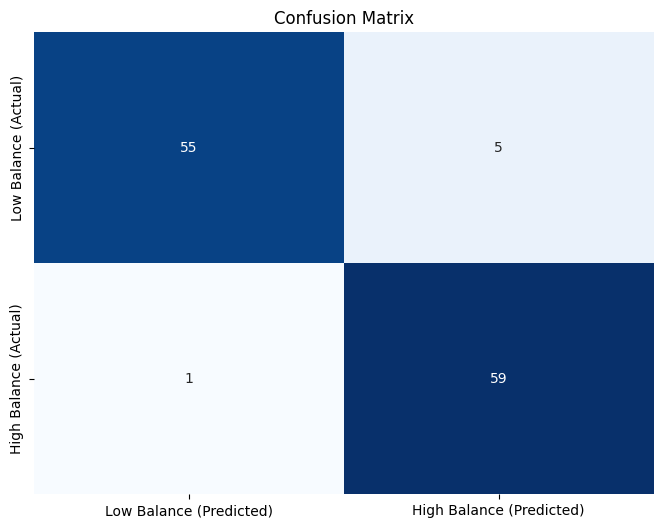

In [ ]:
# Plotting the Confusion Matrix for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low Balance (Predicted)', 'High Balance (Predicted)'],
            yticklabels=['Low Balance (Actual)', 'High Balance (Actual)'])
plt.title('Confusion Matrix')
plt.show()

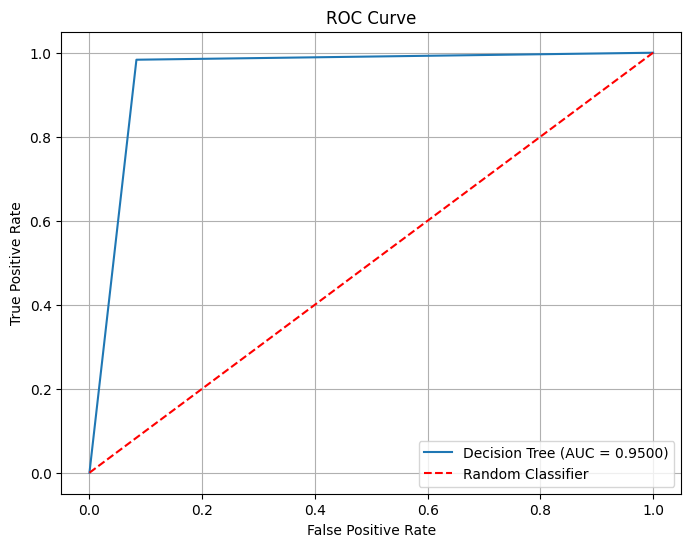

In [ ]:
# --- ROC Curve and AUC ---
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# --- K-Fold Cross-Validation for Robust Performance Estimation ---
# K=5 is a common choice for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:
# Initialize lists to store scores for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

In [ ]:
print("\n--- K-Fold Cross-Validation (K=5) ---")
for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    X_train_cv, X_val_cv = X.iloc[train_index], X.iloc[val_index]
    y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

    # Initialize and train a new model for each fold
    dt_classifier_cv = DecisionTreeClassifier(random_state=42)
    dt_classifier_cv.fit(X_train_cv, y_train_cv)

    # Make predictions on the validation set
    y_pred_cv = dt_classifier_cv.predict(X_val_cv)

    # Calculate and store scores
    accuracy_scores.append(accuracy_score(y_val_cv, y_pred_cv))
    precision_scores.append(precision_score(y_val_cv, y_pred_cv))
    recall_scores.append(recall_score(y_val_cv, y_pred_cv))
    f1_scores.append(f1_score(y_val_cv, y_pred_cv))

    print(f"Fold {fold+1}: Accuracy={accuracy_scores[-1]:.4f}, Precision={precision_scores[-1]:.4f}, Recall={recall_scores[-1]:.4f}, F1={f1_scores[-1]:.4f}")



--- K-Fold Cross-Validation (K=5) ---
Fold 1: Accuracy=0.9375, Precision=0.9268, Recall=0.9500, F1=0.9383
Fold 2: Accuracy=0.9250, Precision=0.9250, Recall=0.9250, F1=0.9250
Fold 3: Accuracy=0.9125, Precision=0.8837, Recall=0.9500, F1=0.9157
Fold 4: Accuracy=0.9375, Precision=0.9268, Recall=0.9500, F1=0.9383
Fold 5: Accuracy=0.9000, Precision=0.9000, Recall=0.9000, F1=0.9000


In [ ]:
# --- Summarize K-Fold Results ---
print("\n--- Summary of K-Fold Cross-Validation ---")
print(f"Average Accuracy: {np.mean(accuracy_scores):.4f} (Std: {np.std(accuracy_scores):.4f})")
print(f"Average Precision: {np.mean(precision_scores):.4f} (Std: {np.std(precision_scores):.4f})")
print(f"Average Recall: {np.mean(recall_scores):.4f} (Std: {np.std(recall_scores):.4f})")
print(f"Average F1-score: {np.mean(f1_scores):.4f} (Std: {np.std(f1_scores):.4f})")


--- Summary of K-Fold Cross-Validation ---
Average Accuracy: 0.9225 (Std: 0.0146)
Average Precision: 0.9125 (Std: 0.0176)
Average Recall: 0.9350 (Std: 0.0200)
Average F1-score: 0.9234 (Std: 0.0145)
